In [2]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats
from MTD import *
import brewer2mpl

Populating the interactive namespace from numpy and matplotlib


In [3]:
#read data
%run dataframe_ts.py
#TS_df = pd.read_csv('../Data/TS_FIRReg_df.csv')
TS_df.head()

,Time,Subject,Condition,Dataset,Run,FFA,PPA,VC
0,1,512,FH,FIR,1,-0.323281,-0.044640,-0.087142
1,2,512,FH,FIR,1,0.129708,0.074479,-0.121480
2,3,512,FH,FIR,1,0.006028,-0.247733,-0.724150
3,4,512,FH,FIR,1,0.399678,-0.270500,-0.115669
4,5,512,FH,FIR,1,1.011820,-0.233612,-0.435582


In [9]:
Subjects = [503,505,508,509,510,512,513,516,517,518,519,523,527,528,529,530,531,532,534,536,537,539,540,542,546,547,549,550]
Conditions = ['FH', 'Fp', 'HF', 'Hp']
#MotorMapping = [1, 2]
corr_df = pd.DataFrame(columns=['Subj', 'Condition', 'Run','Window', 'MTD-FFA-VC', 'MTD-PPA-VC', 'corr-FFA-VC', 'corr-PPA-VC'], dtype=float)
#'Run', 'FFA-M','FFA-NM', 'PPA-M', 'PPA-NM',
Runs = [1, 2, 3, 4]
#motor mapping 1, RH-Face LH-Scene
#motor mapping 2, RH-Scene, LH-Face
i=1
for s, sub in enumerate(Subjects):
    for c, cond in enumerate(Conditions):
        for run in Runs:
            PPA_ts = np.array(TS_df[(TS_df['Subject'] == str(sub)) & (TS_df['Condition'] == cond) & (TS_df['Run'] == run)]['PPA'])
            FFA_ts = np.array(TS_df[(TS_df['Subject'] == str(sub)) & (TS_df['Condition'] == cond) & (TS_df['Run'] == run)]['FFA'])
            VC_ts = np.array(TS_df[(TS_df['Subject'] == str(sub)) & (TS_df['Condition'] == cond) & (TS_df['Run'] == run)]['VC'])
            
            #cal coupling
            cfv = np.corrcoef(np.array([FFA_ts, VC_ts]))[0,1]
            cfp = np.corrcoef(np.array([PPA_ts, VC_ts]))[0,1]
            
            for w in np.arange(1,31):
                corr_df.loc[i, 'Condition'] = cond
                corr_df.loc[i, 'Subj'] = sub
                corr_df.loc[i, 'Run'] = run
                corr_df.loc[i, 'Window'] = w
                corr_df.loc[i,'MTD-FFA-VC'] = np.nanmean(coupling(np.array([FFA_ts, VC_ts]).T, w)[1][:,0,1])
                corr_df.loc[i,'MTD-PPA-VC'] = np.nanmean(coupling(np.array([PPA_ts, VC_ts]).T, w)[1][:,0,1])
                corr_df.loc[i,'corr-FFA-VC'] = cfv
                corr_df.loc[i,'corr-PPA-VC'] = cfp
                i = i+1

In [10]:
stat_df = corr_df.groupby(['Subj','Condition','Window']).mean().reset_index()
#stat_df.head()

mean_df = stat_df.groupby(['Condition','Window']).mean().reset_index()
sem_df = stat_df.groupby(['Condition','Window']).sem().reset_index()
mean_df.head()
#sem_df.head()

,Condition,Window,Subj,Run,MTD-FFA-VC,MTD-PPA-VC,corr-FFA-VC,corr-PPA-VC
0,FH,1,526.785714,2.5,0.238174,0.084650,0.329868,0.080267
1,FH,2,526.785714,2.5,0.239026,0.085216,0.329868,0.080267
2,FH,3,526.785714,2.5,0.239176,0.085254,0.329868,0.080267
3,FH,4,526.785714,2.5,0.239089,0.084455,0.329868,0.080267
4,FH,5,526.785714,2.5,0.238856,0.083846,0.329868,0.080267


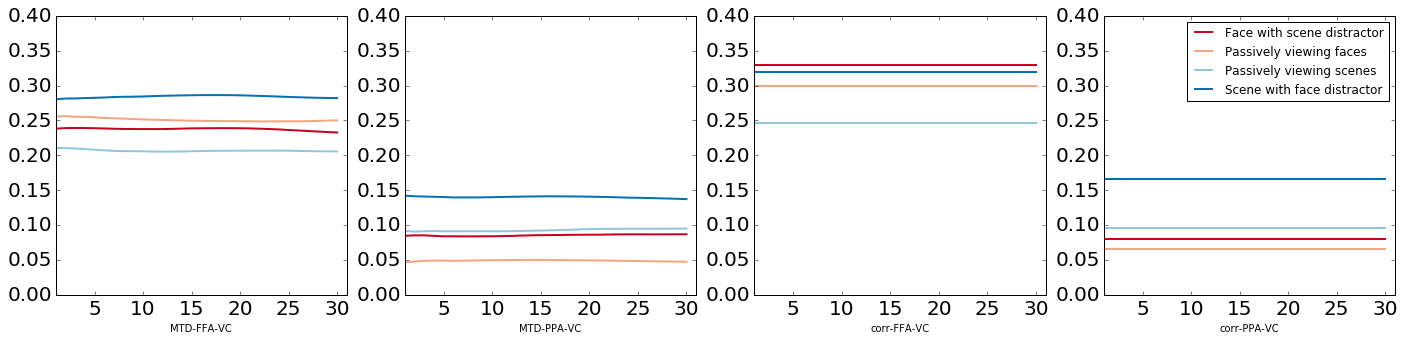

In [13]:
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20) 
ROIpairs = ['MTD-FFA-VC', 'MTD-PPA-VC','corr-FFA-VC', 'corr-PPA-VC']
Conditions =['FH', 'Fp', 'Hp', 'HF']
Labels = ['Face with scene distractor', 'Passively viewing faces ', 'Passively viewing scenes', 'Scene with face distractor']
x = np.arange(1,31)
#get colormap
cmap = brewer2mpl.get_map('RdBu','diverging', 4)
plt.figure(1)
plt.figure(figsize=(24,5))
for r, roi in enumerate(ROIpairs):
    plt.subplot(1, 4, r+1)
    
    for i, c in enumerate(Conditions):
        y = np.array(mean_df[(mean_df['Condition'] == c)][roi])
        error = np.array(sem_df[(mean_df['Condition'] == c)][roi])
        plt.plot(x, y, color = cmap.hex_colors[i], linewidth=2  )
       
        #plt.fill_between(x, y-1*error, y+1*error, alpha=0.2, edgecolor=cmap.hex_colors[i], 
        #             facecolor=cmap.hex_colors[i], label=c)

        plt.ylim(0,0.4)
        plt.xlim(1, 31)
        plt.xlabel(roi)
plt.legend(Labels)
plt.show()